In [37]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('stop_pairs.csv')
df['RouteColor_A'] = '#'+ df['RouteColor_A']
df['RouteColor_B'] = '#' + df['RouteColor_B']
df

,StopName_A,StopName_B,Location_A,Location_B,StopID_A,StopID_B,Route_A,Route_B,RouteColor_A,RouteColor_B
0,Deák Ferenc tér,Deák Ferenc tér,"(47.497413, 19.055158)","(47.497593, 19.053857)",007884,F00961,47,M2,#FFD800,#E41F18
1,Deák Ferenc tér,Deák Ferenc tér,"(47.497413, 19.055158)","(47.498843, 19.053605)",007884,F00960,47,M2,#FFD800,#E41F18
2,Deák Ferenc tér,Deák Ferenc tér,"(47.497413, 19.055158)","(47.49772, 19.05367)",007884,F00962,47,M1,#FFD800,#FFD800
3,Deák Ferenc tér,Deák Ferenc tér,"(47.497413, 19.055158)","(47.497728, 19.054142)",007884,F00963,47,M1,#FFD800,#FFD800
4,Deák Ferenc tér,Deák Ferenc tér,"(47.497413, 19.055158)","(47.49744, 19.055729)",007884,009309,47,934,#FFD800,#000000
...,...,...,...,...,...,...,...,...,...,...
25436,Batthyány tér,Batthyány tér,"(47.506776, 19.039318)","(47.506826, 19.038103)",F00060,F00063,H5,M2,#8A236C,#E41F18
25437,Batthyány tér,Batthyány tér,"(47.506776, 19.039318)","(47.507412, 19.036739)",F00060,F00062,H5,M2,#8A236C,#E41F18
25438,"Margit híd, budai hídfő","Margit híd, budai hídfő","(47.514908, 19.039227)","(47.515041, 19.038937)",F00186,F00236,H5,N19,#8A236C,#FF9900
25439,Batthyány tér,Batthyány tér,"(47.506776, 19.039318)","(47.506826, 19.038103)",003209,F00063,H5,M2,#8A236C,#E41F18


In [27]:
G = nx.from_pandas_edgelist(df, 'Route_A', 'Route_B')


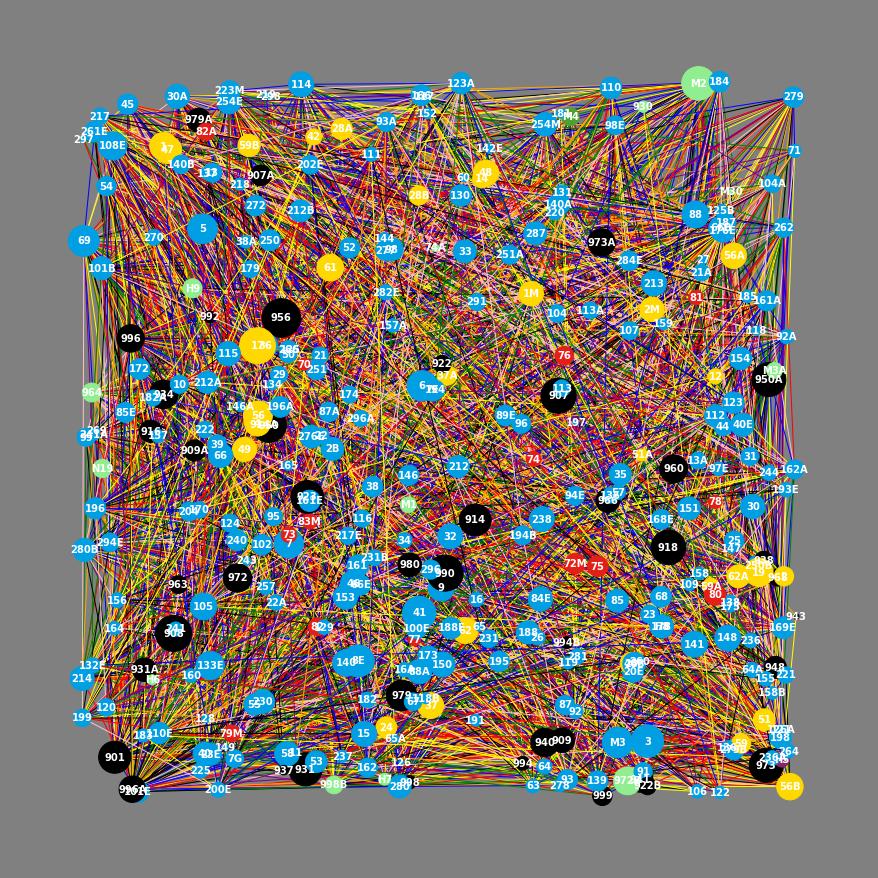

In [96]:
fig = plt.figure(figsize=(12,12))

d = dict(df.drop_duplicates(subset=['Route_A','RouteColor_A'])[['Route_A','RouteColor_A']].to_numpy().tolist())
nodes = G.nodes()
pos = nx.draw_random(G, with_labels=True, 
              nodelist=nodes,
              node_color=[d.get(i,'lightgreen') for i in nodes], 
              node_size=[v*10 for v in dict(G.degree()).values()],
              font_size=10,
              font_color='white',
              font_weight='bold',
              edge_color=np.random.choice(['red','blue','green','yellow','orange','purple','pink','black'], size=len(G.edges())))
fig.set_facecolor('gray')
plt.show()

In [113]:
most_degree = {n:d for n, d in G.degree()}
most_degree = sorted(most_degree.items(), key=lambda x: x[1], reverse=True)
most_degree[:20]

[('956', 149),
 ('908', 130),
 ('990', 130),
 ('17', 129),
 ('907', 124),
 ('918', 120),
 ('950', 119),
 ('973', 117),
 ('950A', 116),
 ('M2', 113),
 ('41', 112),
 ('931', 110),
 ('923', 108),
 ('3', 105),
 ('901', 103),
 ('914', 102),
 ('8E', 102),
 ('69', 96),
 ('M3', 94),
 ('979', 93)]

Text(0, 0.5, '# of Nodes')

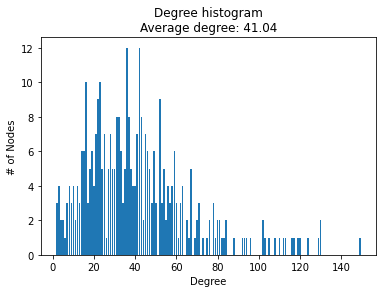

In [110]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram\nAverage degree: {:.2f}".format(np.mean(degree_sequence)))
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

In [121]:
clust = nx.clustering(G)
print(f'Global clustering coefficient: {nx.average_clustering(G)}\nLocal clustering coefficient: {np.mean(list(clust.values()))}')

Global clustering coefficient: 0.557596582919251
Local clustering coefficient: 0.5575965829192511
